In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


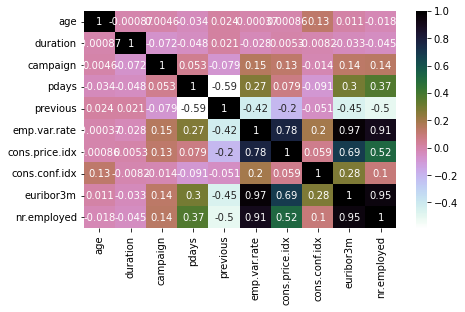

In [6]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

In [7]:
# df['y'][df['y']=='yes']=1
# df['y'][df['y']=='no']=0

In [8]:
# df_new = pd.get_dummies(df, drop_first=True)

In [9]:
# df_full_train,df_test=train_test_split(df_new,test_size=0.2,random_state=11)
# df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=11)

In [10]:
# df_train = df_train.reset_index(drop=True)
# df_val = df_val.reset_index(drop=True)
# df_test = df_test.reset_index(drop=True)

In [11]:
# df_train.head()

In [12]:
# y_train = (df_train.y_1 == 'default').astype('int').values
# y_val = (df_val.y_1 == 'default').astype('int').values
# y_test = (df_test.y_1 == 'default').astype('int').values

In [13]:
# del df_train['y_1']
# del df_val['y_1']
# del df_test['y_1']

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [15]:
# dv=DictVectorizer(sparse=False)
# train_dicts=df_train.fillna(0).to_dict(orient='records')
# X_train=dv.fit_transform(train_dicts)
# val_dicts=df_val.fillna(0).to_dict(orient='records')
# X_val=dv.fit_transform(val_dicts)

In [16]:
# dt=DecisionTreeClassifier()
# dt.fit(X_train,y_train)

In [17]:
# y_pred=dt.predict(X_val)

In [18]:
# metrics.accuracy_score(y_val,y_pred)

In [19]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
df['job'].describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [ ]:
df['']

In [21]:
from sklearn import preprocessing 

In [22]:
label_encoder = preprocessing.LabelEncoder() 
 
df['job']= label_encoder.fit_transform(df['job']) 
  
df['job'].unique() 

array([ 3,  7,  0,  1,  9,  5,  4, 10,  6, 11,  2,  8])

In [23]:
df = pd.get_dummies(df, columns=['marital'])
df.head()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,marital_unknown
0,56,3,basic.4y,no,no,no,telephone,may,mon,261,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
1,57,7,high.school,unknown,no,no,telephone,may,mon,149,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
2,37,7,high.school,no,yes,no,telephone,may,mon,226,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
3,40,0,basic.6y,no,no,no,telephone,may,mon,151,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
4,56,7,high.school,no,no,yes,telephone,may,mon,307,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0


In [24]:
df['education'].describe()

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [25]:
df['education']= label_encoder.fit_transform(df['education']) 
  
df['education'].unique() 

array([0, 3, 1, 2, 5, 7, 6, 4])

In [26]:
df['default'].describe()

count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

In [27]:
df = pd.get_dummies(df, columns=['default'])
df.head()

,age,job,education,housing,loan,contact,month,day_of_week,duration,campaign,...,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes
0,56,3,0,no,no,telephone,may,mon,261,1,...,4.857,5191.0,no,0,1,0,0,1,0,0
1,57,7,3,no,no,telephone,may,mon,149,1,...,4.857,5191.0,no,0,1,0,0,0,1,0
2,37,7,3,yes,no,telephone,may,mon,226,1,...,4.857,5191.0,no,0,1,0,0,1,0,0
3,40,0,1,no,no,telephone,may,mon,151,1,...,4.857,5191.0,no,0,1,0,0,1,0,0
4,56,7,3,no,yes,telephone,may,mon,307,1,...,4.857,5191.0,no,0,1,0,0,1,0,0


In [28]:
df['housing'].describe()

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

In [29]:
df = pd.get_dummies(df, columns=['housing'])
df.head()

,age,job,education,loan,contact,month,day_of_week,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes
0,56,3,0,no,telephone,may,mon,261,1,999,...,0,1,0,0,1,0,0,1,0,0
1,57,7,3,no,telephone,may,mon,149,1,999,...,0,1,0,0,0,1,0,1,0,0
2,37,7,3,no,telephone,may,mon,226,1,999,...,0,1,0,0,1,0,0,0,0,1
3,40,0,1,no,telephone,may,mon,151,1,999,...,0,1,0,0,1,0,0,1,0,0
4,56,7,3,yes,telephone,may,mon,307,1,999,...,0,1,0,0,1,0,0,1,0,0


In [30]:
df['loan'].describe()

count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

In [31]:
df = pd.get_dummies(df, columns=['loan'])
df.head()

,age,job,education,contact,month,day_of_week,duration,campaign,pdays,previous,...,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,3,0,telephone,may,mon,261,1,999,0,...,0,1,0,0,1,0,0,1,0,0
1,57,7,3,telephone,may,mon,149,1,999,0,...,0,0,1,0,1,0,0,1,0,0
2,37,7,3,telephone,may,mon,226,1,999,0,...,0,1,0,0,0,0,1,1,0,0
3,40,0,1,telephone,may,mon,151,1,999,0,...,0,1,0,0,1,0,0,1,0,0
4,56,7,3,telephone,may,mon,307,1,999,0,...,0,1,0,0,1,0,0,0,0,1


In [32]:
df['contact'].describe()

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

In [33]:
df = pd.get_dummies(df, columns=['contact'])
df.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,poutcome,...,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone
0,56,3,0,may,mon,261,1,999,0,nonexistent,...,0,0,1,0,0,1,0,0,0,1
1,57,7,3,may,mon,149,1,999,0,nonexistent,...,1,0,1,0,0,1,0,0,0,1
2,37,7,3,may,mon,226,1,999,0,nonexistent,...,0,0,0,0,1,1,0,0,0,1
3,40,0,1,may,mon,151,1,999,0,nonexistent,...,0,0,1,0,0,1,0,0,0,1
4,56,7,3,may,mon,307,1,999,0,nonexistent,...,0,0,1,0,0,0,0,1,0,1


In [34]:
df['month']= label_encoder.fit_transform(df['month']) 
  
df['month'].unique() 

array([6, 4, 3, 1, 8, 7, 2, 5, 0, 9])

In [35]:
df['day_of_week']= label_encoder.fit_transform(df['day_of_week']) 
  
df['day_of_week'].unique()

array([1, 3, 4, 2, 0])

In [36]:
df['poutcome'].describe()

count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

In [37]:
df = pd.get_dummies(df, columns=['poutcome'])
df.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3,0,6,1,261,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
1,57,7,3,6,1,149,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
2,37,7,3,6,1,226,1,999,0,1.1,...,0,1,1,0,0,0,1,0,1,0
3,40,0,1,6,1,151,1,999,0,1.1,...,0,0,1,0,0,0,1,0,1,0
4,56,7,3,6,1,307,1,999,0,1.1,...,0,0,0,0,1,0,1,0,1,0


In [38]:
df['y'].describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [39]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [40]:
df['y']= label_encoder.fit_transform(df['y']) 
  
df['y'].unique() 

array([0, 1])

In [41]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [42]:
df.head()

,age,job,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,3,0,6,1,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
1,57,7,3,6,1,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,37,7,3,6,1,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0
3,40,0,1,6,1,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,56,7,3,6,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0


In [43]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

In [44]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [45]:
y_train = (df_train.y == 1).astype('int').values
y_val = (df_val.y == 1).astype('int').values
y_test = (df_test.y == 1).astype('int').values

In [46]:
del df_train['y']
del df_val['y']
del df_test['y']

In [47]:
# dv=DictVectorizer(sparse=False)
# train_dicts=df_train.fillna(0).to_dict(orient='records')
# X_train=dv.fit_transform(train_dicts)
# val_dicts=df_val.fillna(0).to_dict(orient='records')
# X_val=dv.fit_transform(val_dicts)

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   24712 non-null  int64  
 1   job                   24712 non-null  int64  
 2   education             24712 non-null  int64  
 3   month                 24712 non-null  int64  
 4   day_of_week           24712 non-null  int64  
 5   duration              24712 non-null  int64  
 6   campaign              24712 non-null  int64  
 7   pdays                 24712 non-null  int64  
 8   previous              24712 non-null  int64  
 9   emp.var.rate          24712 non-null  float64
 10  cons.price.idx        24712 non-null  float64
 11  cons.conf.idx         24712 non-null  float64
 12  euribor3m             24712 non-null  float64
 13  nr.employed           24712 non-null  float64
 14  marital_divorced      24712 non-null  uint8  
 15  marital_married    

In [49]:
y_train==1

array([False,  True, False, ..., False, False, False])

## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model=LogisticRegression()
model.fit(df_train,y_train)

LogisticRegression()

In [52]:
y_pred=model.predict_proba(df_val)[:,1]
roc_auc_score(y_val,y_pred)

0.9229850746268656

## Decision Tree

In [53]:
dt=DecisionTreeClassifier()
dt.fit(df_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=dt.predict_proba(df_val)[:,1]

In [55]:
roc_auc_score(y_val,y_pred)

0.7303423197125917

## Save the model

In [56]:
import pickle

In [57]:
output_file=f'model.bin'

In [58]:
f_out=open(output_file,'wb')

In [59]:
pickle.dump(model,f_out)
f_out.close()

## load the model

In [60]:
with open(output_file,'rb') as f_in:
    model=pickle.load(f_in)